<a href="https://colab.research.google.com/github/beryl09/beryl09/blob/main/Copy_of_PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of counties performances towards growth and development of the New Jersey State**

**Focus:**

The  agenda to my research is based on using different variables to examine the performances of counties based on their  growth and development. My focus is on economic indicators(unemployment rates and per capita ratio), Health ranks county wise and Crime Rate.Studying these factors plays a major role in identifying the counties that performs weak so that the limitation may be identified and required resources and utilities may distributed to enhance their growth.

The analysis will utilize datasets obtained at both the county  level for a more localized examination. Through the subsequent maps and visualizations, I aim to explore the potential correlation between unemployment, per capita ratios, healthcare based performances and crime rates within within the counties in the  New Jersey.

**Resources**

The data incorporated in this study were drawn from:

Survey:Unemployment Statistics 2021
Data Source: U.S. Bureau of Labor Statistics

Health Data 2023 Release

FBI Crime Data 2019

NJ shapefile: https://github.com/beryl09/beryl09/blob/main/nj_counties.zip

Unemployment Statistic: https://www.socialexplorer.com/data/

US_unemployment_2021

Health Data 2023: https://www.socialexplorer.com/data/HD2023

Crime Data: https://www.socialexplorer.com/data/FBI19

In [ ]:
# @title
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
# @title
!pip install mapclassify
import mapclassify #need for thematic map classification
!pip install geodatasets
!pip install geopandas

**Mapping New Jersey counties shapefile**

In [ ]:

import zipfile
import os

!wget -q -O nj-counties.zip https://github.com/beryl09/beryl09/raw/main/County_Boundaries_of_NJ%202.zip

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

os.remove('nj-counties.zip')


In [ ]:
njC.dtypes

OBJECTID         int64
GLOBALID        object
COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2020          int64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2020       int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

**Command used for visualizing a GeoDataFrame(in this case 'njC')using the default plotting capabilities of Geopandas**

<Axes: >

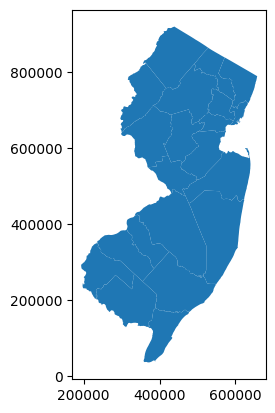

In [ ]:
njC.plot()


**Analysis of unemployment rates and per capita ratios(All Races)**

**1. Unemployment Rates**

**Code for downloading labor forces xlsx file from github and extracting it**

In [ ]:
! wget -q -O labor_forces.xlsx https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx

In [ ]:
lab=pd.read_excel('/content/labor_forces.xlsx',skiprows=2) #load the labor forces estimates xlsx file

In [ ]:
lab['County']=lab['County'].str.upper()

In [ ]:
lab.dtypes

County                    object
Labor Force              float64
Employment               float64
Unemployment             float64
Unemployment Rate (%)    float64
dtype: object

In [ ]:
lab.head(25)

,County,Labor Force,Employment,Unemployment,Unemployment Rate (%)
0,ATLANTIC,140527.0,122988.0,17539.0,12.5
1,BERGEN,480364.0,441308.0,39056.0,8.1
2,BURLINGTON,236893.0,215253.0,21640.0,9.1
3,CAMDEN,264642.0,235220.0,29422.0,11.1
4,CAPE MAY,50222.0,43082.0,7140.0,14.2
5,CUMBERLAND,72646.0,63067.0,9579.0,13.2
6,ESSEX,382784.0,340655.0,42129.0,11.0
7,GLOUCESTER,152479.0,136584.0,15895.0,10.4
8,HUDSON,354023.0,319751.0,34272.0,9.7
9,HUNTERDON,68375.0,63243.0,5132.0,7.5


In [ ]:
njC = pd.merge(
    left = njC,
    right = lab,
    left_on ='COUNTY',
    right_on='County',
    how='outer',indicator=True
)

In [ ]:
njC[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [ ]:
njC.dtypes

OBJECTID                  float64
GLOBALID                   object
COUNTY                     object
COUNTY_LAB                 object
CO                         object
GNIS_NAME                  object
GNIS                       object
FIPSSTCO                   object
FIPSCO                     object
ACRES                     float64
SQ_MILES                  float64
POP2020                   float64
POP2010                   float64
POP2000                   float64
POP1990                   float64
POP1980                   float64
POPDEN2020                float64
POPDEN2010                float64
POPDEN2000                float64
POPDEN1990                float64
POPDEN1980                float64
REGION                     object
Shape_Leng                float64
Shape_Area                float64
geometry                 geometry
County                     object
Labor Force               float64
Employment                float64
Unemployment              float64
Unemployment R

In [ ]:
lab.dtypes

County                    object
Labor Force              float64
Employment               float64
Unemployment             float64
Unemployment Rate (%)    float64
dtype: object

<Axes: >

Text(0.5, 1.0, 'Map of Unemployment Rate (%) of New Jersey (per counties level)')

Text(0.5, 58.7222222222222, 'source/definition: https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx ')

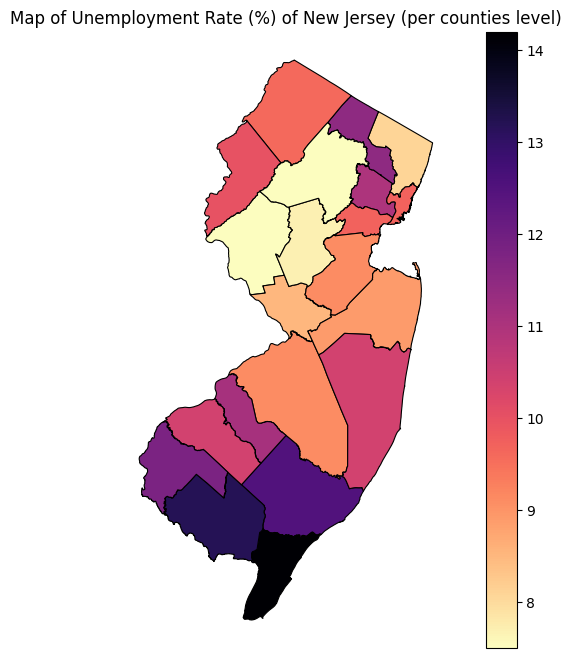

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njC.plot(ax=ax,column = 'Unemployment Rate (%)' ,cmap='magma_r', linewidth=0.8, edgecolor='black', legend=True) #RdBu,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Unemployment Rate (%) of New Jersey (per counties level)')
ax.set_xlabel('''source/definition: https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx ''')
ax.set_axis_off()
plt.show()

**Conclusion**

From the map above it gives an indication that the counties towards the south Jersey records highest unemployment rates. High unemployment rates at the county level can indicate several economic and social challenges.According to my research i will emphasize on per capita ratios, health impacts and crime rates level.

In [ ]:
#lab=pd.read_excel("https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx",).head(5)
#import seaborn as sns
#lab=pd.read_excel('https://github.com/beryl09/beryl09/raw/main/annual%20labor%20force_county%202010-2022.xlsx',skiprows=2)
#lab.head()
#lab[:10].style.background_gradient(cmap='Greens')
#sns.heatmap(lab.corr().round(2),cmap="BrBG",annot=True)
#import plotly.express as px #a quick simple one
#import plotly.graph_objects as go #can get convoluted
#import numpy as np
#px.scatter(lab, x="Unemployment", y="Unemployment Rate (%)", color="Labor Force",
                  #hover_data=['County'],width=1000,height=600)




**2.wages in per capita ratios**

**Code for loading Annual Wage excel file from github and extracting it**

In [ ]:
! wget -q -O percapital.xlsx https://github.com/beryl09/beryl09/raw/main/pcincrace5.xls
percapita=pd.read_excel('/content/percapital.xlsx',skiprows=7)
new_column_names = {
    'Unnamed: 0':'County',
    'Unnamed: 1':'Per capita ratio',
    'Unnamed: 2':'Whites Alone',
    'Unnamed: 3':'Black Alone',
    'Unnamed: 4':'American Indian',
    'Unnamed: 5':'Asian Alone',
}
percapita.rename(columns=new_column_names, inplace=True)
percapita['County'] = percapita['County'].str.replace(' County', '')
percapita['County']=percapita['County'].str.upper()
percapita = percapita[['County', 'Per capita ratio','Whites Alone','Asian Alone']]
percapita1 = percapita.dropna()
percapita1['Per capita ratio'] =percapita1['Per capita ratio'].str.replace(',', '',).astype('int')
percapita1['Whites Alone'] =percapita1['Whites Alone'].str.replace(',', '',).astype('int')
percapita1['Asian Alone'] =percapita1['Asian Alone'].str.replace(',', '',).astype('int')
njC1 = pd.merge(
    left=njC,
    right=percapita1,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', '_percapita'),
)
njC1[['COUNTY','County','_merge']]
njC1.dtypes

<ipython-input-259-d74093c23328>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-d74093c23328>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-d74093c23328>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


OBJECTID                  float64
GLOBALID                   object
COUNTY                     object
COUNTY_LAB                 object
CO                         object
GNIS_NAME                  object
GNIS                       object
FIPSSTCO                   object
FIPSCO                     object
ACRES                     float64
SQ_MILES                  float64
POP2020                   float64
POP2010                   float64
POP2000                   float64
POP1990                   float64
POP1980                   float64
POPDEN2020                float64
POPDEN2010                float64
POPDEN2000                float64
POPDEN1990                float64
POPDEN1980                float64
REGION                     object
Shape_Leng                float64
Shape_Area                float64
geometry                 geometry
County                     object
Labor Force               float64
Employment                float64
Unemployment              float64
Unemployment R

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Unemployment Rate (%) (county wise)')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Per capita ratio')

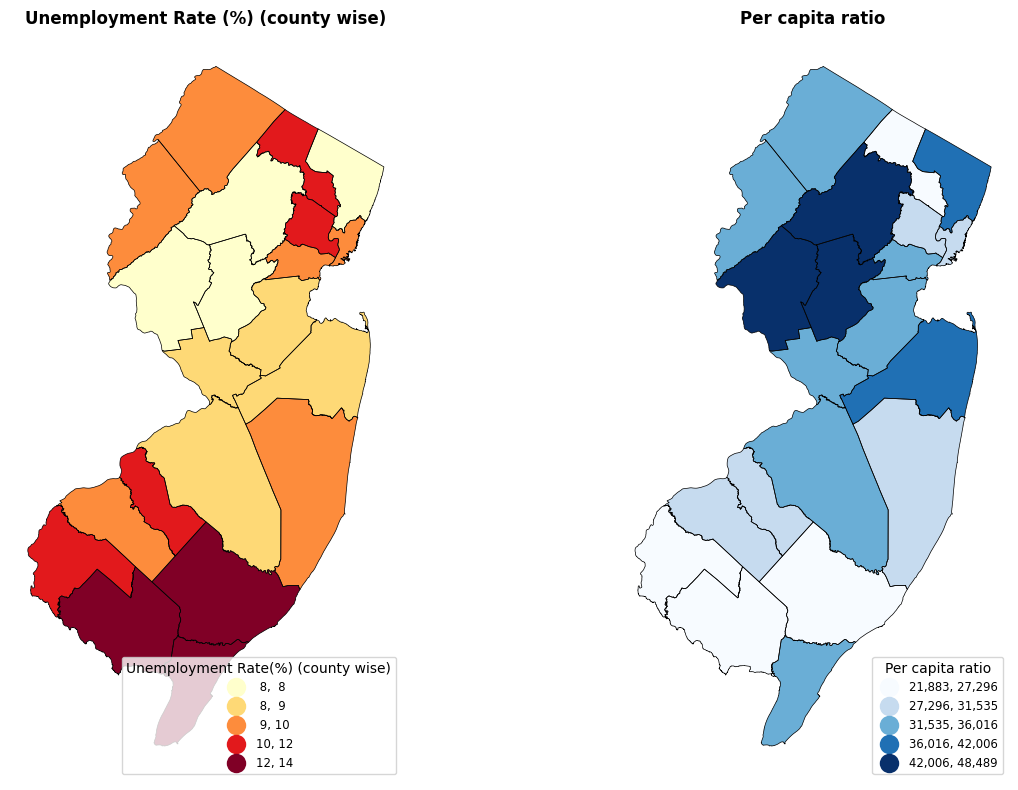

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

njC.boundary.plot(ax=ax1, edgecolor='black', linewidth=0.5)
njC.plot(ax=ax1, column='Unemployment Rate (%)', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': 'Unemployment Rate(%) (county wise)'})

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax1.spines[edge].set_visible(False)

ax1.set_title('Unemployment Rate (%) (county wise)', size=12, weight='bold')

njC1.boundary.plot(ax=ax2, edgecolor='black', linewidth=0.5)
njC1.plot(ax=ax2, column='Per capita ratio', legend=True, cmap='Blues', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': 'Per capita ratio'})

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax2.spines[edge].set_visible(False)

ax2.set_title('Per capita ratio', size=12, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**conclusion:**

From the datasets analysis there is a strong relationship between unemployment rates and percapita ratio.This indicates that counties with highset rate of unemployment records low rates of percapita income and therefore it means that comparing standards of living, economic development, and resource utilization across different regions is very low. However there is a need distribution of resources to the regions to help in boost the growth of the weakest counties.

# **Health Data Analysis**

**Hospital performances Ranks**

In [ ]:
! wget -q -O health_ranks.xlsx https://github.com/beryl09/beryl09/raw/main/2023%20County%20Health%20Rankings%20New%20Jersey%20Data%20-%20v2.xlsx

In [ ]:
Health=pd.read_excel('/content/health_ranks.xlsx')


DataFrame with selected columns:

DataFrame after renaming columns:


<ipython-input-263-7c228587df13>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,County,Length of life Rank,Quality of life Rank,Health Behaviors Ranks,Clinical care Ranks,Social and Economic Factors Ranks,Physical Enviroment Ranks
1,Atlantic,19.0,16.0,19.0,15.0,20.0,8.0
2,Bergen,2.0,5.0,3.0,1.0,4.0,21.0
3,Burlington,10.0,9.0,9.0,6.0,7.0,15.0
4,Camden,17.0,18.0,17.0,13.0,15.0,20.0


<ipython-input-263-7c228587df13>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

<Axes: >

[]

[]

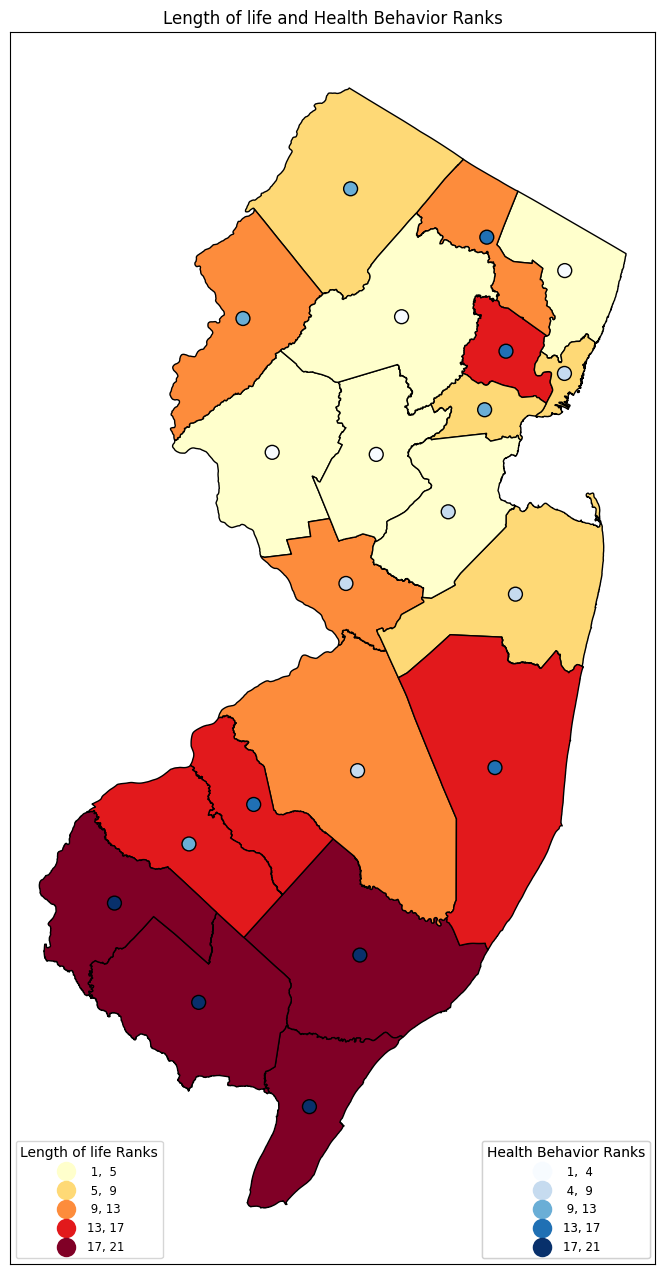

In [ ]:
sheet_name = 'Outcomes & Factors SubRankings'
Health = pd.read_excel('/content/health_ranks.xlsx', sheet_name='Outcomes & Factors SubRankings',skiprows=1)

Health_cleaned = Health.dropna()


selected_columns = Health_cleaned[['County','Rank', 'Rank.1','Rank.2','Rank.3','Rank.4','Rank.5']]
print("\nDataFrame with selected columns:")

new_column_names = {'Rank': 'Length of life Rank', 'Rank.1': 'Quality of life Rank', 'Rank.2': 'Health Behaviors Ranks','Rank.3': 'Clinical care Ranks','Rank.4': 'Social and Economic Factors Ranks','Rank.5': 'Physical Enviroment Ranks'}
selected_columns.rename(columns=new_column_names, inplace=True)

print("\nDataFrame after renaming columns:")
selected_columns.head(4)

selected_columns['County']=selected_columns['County'].str.upper()

njC = pd.merge(
    left = njC,
    right =selected_columns,
    left_on ='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', 'selected_columns'),
)
newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Length of life Rank',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Length of life Ranks''')

newmap.plot(ax=ax,column='Health Behaviors Ranks',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("Length of life and Health Behavior Ranks")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Health Behavior Ranks''')


ax.add_artist(l2)
ax.add_artist(l1)




**Conclusion**

From the map idication, length of life per counties has strong relationship with health behavior ranks and length of life ranks. Length of life refers to the average number of years a person can expect to live and Health behavior encompasses actions and habits that individuals adopt that either contribute to or detract from their overall health. Getting detaily into this analysis we conclude that the counties towards the South Jersey records low levels of health ranks and length of life due to lack of proper distribution of healthcare units.


DataFrame after renaming columns:


,COUNTY,Geo_NAME,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


<Axes: >

<Axes: >

[]

[]

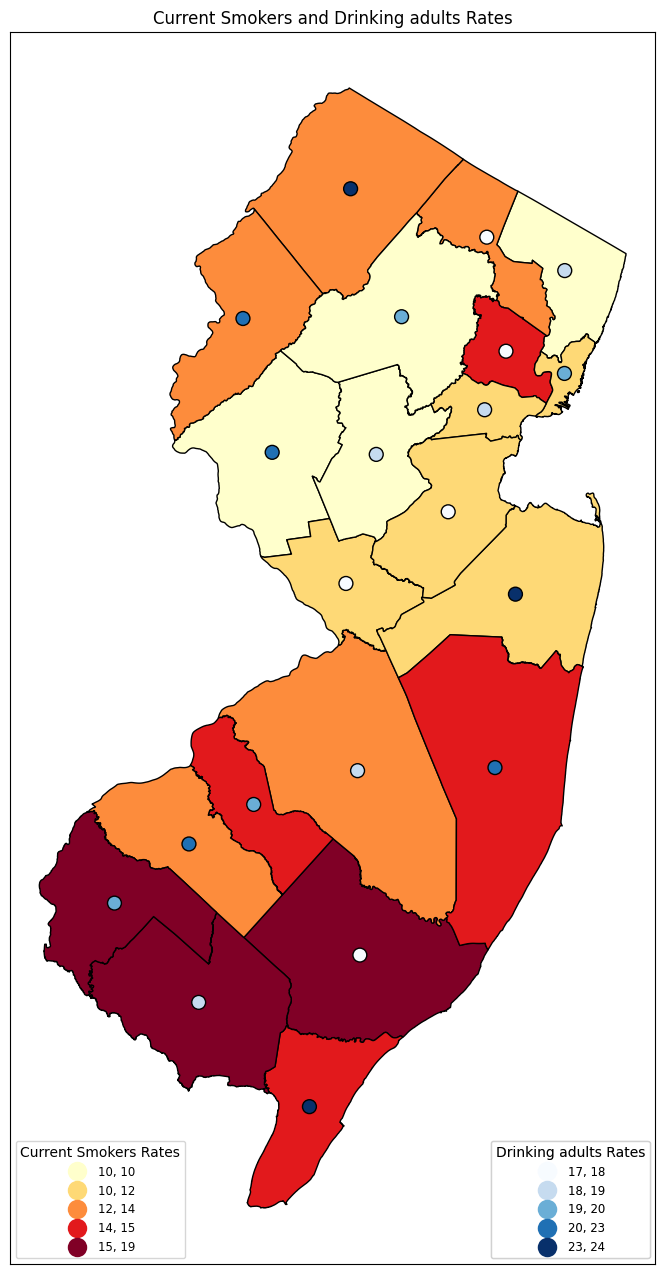

In [ ]:
import pandas as pd
github_csv_url = 'https://github.com/beryl09/beryl09/raw/main/Tobacco%20and%20Alcohol%20usage.csv'
health = pd.read_csv(github_csv_url)

new_column_names = {'Geo_Name': 'County',
                    'SE_T011_001': 'Current Smokers',
                    'SE_T011_002':'Drinking adults'}

health.rename(columns=new_column_names, inplace=True)
print("\nDataFrame after renaming columns:")

health['Geo_NAME'] = health['Geo_NAME'].str.replace(' County', '')
health['Geo_NAME']=health['Geo_NAME'].str.upper()

njC = pd.merge(
    left = njC,
    right = health,
    left_on ='COUNTY',
    right_on='Geo_NAME',
    how='outer',
    suffixes=('', 'health'),
)

njC[['COUNTY','Geo_NAME','_merge']]

newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Current Smokers',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Current Smokers Rates''')

newmap.plot(ax=ax,column='Drinking adults',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("Current Smokers and Drinking adults Rates")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Drinking adults Rates''')


ax.add_artist(l2)
ax.add_artist(l1)






**conclusion**

This clearly indicates that from the analysis of the health behaviors and length of life the Regions of South New Jersey state records high rates of smoking and drinking of alcohol that subject their lives to minimal survival length.

In [ ]:
health[:10].style.background_gradient(cmap='Greens')

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Current Smokers,Drinking adults
0,34001,ATLANTIC,"Atlantic County, New Jersey",0,34,1,16.700000,17.537823
1,34003,BERGEN,"Bergen County, New Jersey",0,34,3,10.500000,18.644612
2,34005,BURLINGTON,"Burlington County, New Jersey",0,34,5,12.800000,19.327722
3,34007,CAMDEN,"Camden County, New Jersey",0,34,7,15.200000,20.032324
4,34009,CAPE MAY,"Cape May County, New Jersey",0,34,9,14.900000,23.263439
5,34011,CUMBERLAND,"Cumberland County, New Jersey",0,34,11,19.100000,18.616385
6,34013,ESSEX,"Essex County, New Jersey",0,34,13,14.400000,17.337296
7,34015,GLOUCESTER,"Gloucester County, New Jersey",0,34,15,13.400000,22.403663
8,34017,HUDSON,"Hudson County, New Jersey",0,34,17,11.900000,20.377187
9,34019,HUNTERDON,"Hunterdon County, New Jersey",0,34,19,10.300000,22.239416


In [ ]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [ ]:
px.scatter(health, x="Current Smokers", y="Drinking adults",
                  hover_data=['Geo_NAME'],width=1000,height=600)

In [ ]:
import time, webbrowser, zipfile
import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()
from geopandas.tools import geocode

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='blah@gmail.com')
from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install mapclassify
import mapclassify

# **Violence and property crime analysis**

,Geo_FIPS,Geo_Name,Geo_QName,SE_T003_001,SE_T003_002,SE_T003_003
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995



DataFrame after renaming columns:


,Geo_FIPS,County,Geo_QName,"Total crime and violent rates(per 100,000 popul)","Violent crime rates(per 100,000)","Property crime rates(per 100,000 popul)"
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995


,Geo_FIPS,County,Geo_QName,"Total crime and violent rates(per 100,000 popul)","Violent crime rates(per 100,000)","Property crime rates(per 100,000 popul)"
0,34001,ATLANTIC,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,BERGEN,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,BURLINGTON,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,CAMDEN,"Camden County, New Jersey",3028.933269,467.871274,2561.061995


<Axes: >

<Axes: >

[]

[]

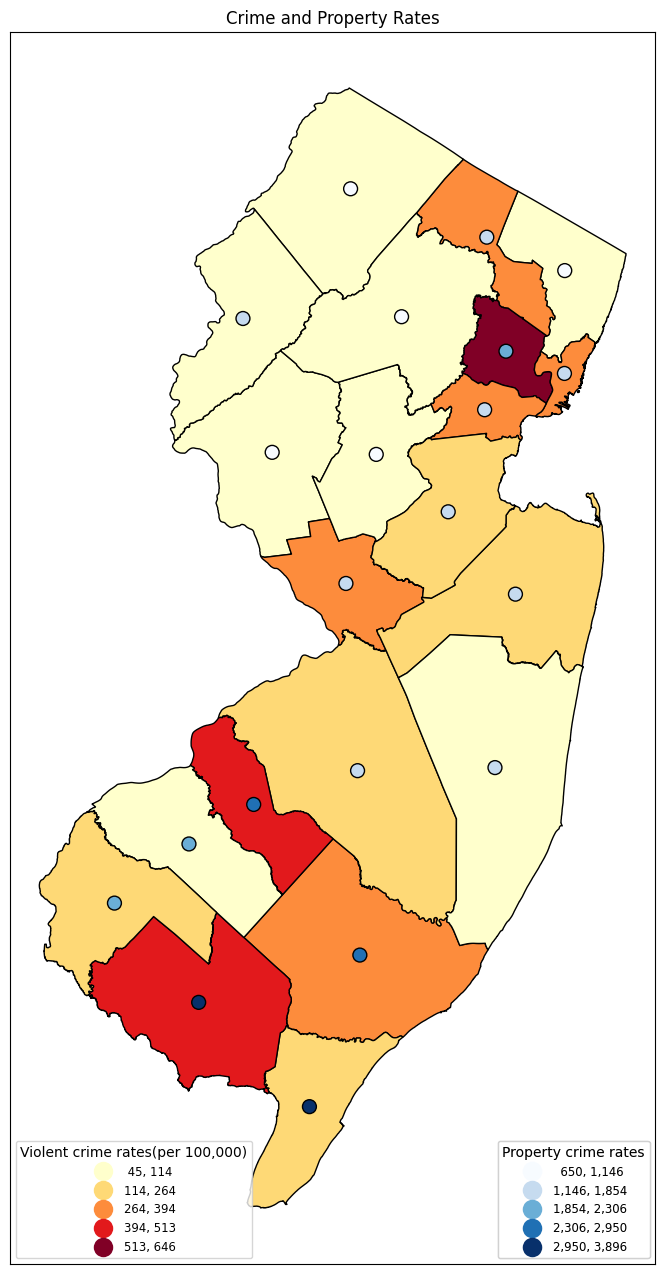

In [ ]:
import pandas as pd
github_csv_url = 'https://github.com/beryl09/beryl09/raw/main/crime%20and%20property%20dataset_SL050.csv'
dataset = pd.read_csv(github_csv_url)

dataset.head(4)
new_column_names = {'Geo_Name': 'County',
                    'SE_T003_001': 'Total crime and violent rates(per 100,000 popul)',
                    'SE_T003_002':'Violent crime rates(per 100,000)',
                    'SE_T003_003':'Property crime rates(per 100,000 popul)'
                    }

dataset.rename(columns=new_column_names, inplace=True)
print("\nDataFrame after renaming columns:")
dataset.head(4)

dataset['County'] = dataset['County'].str.replace(' County', '')
dataset['County']= dataset['County'].str.upper()
dataset.head(4)

njC = pd.merge(
    left = njC,
    right = dataset,
    left_on ='COUNTY',
    right_on='County',
    how='outer',
    suffixes=('', 'dataset'),
)

newmap = njC.copy()

newmap["geometry"] = newmap["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(12,16))
njC.plot(ax=ax,column='Violent crime rates(per 100,000)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Violent crime rates(per 100,000)''')

newmap.plot(ax=ax,column='Property crime rates(per 100,000 popul)',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100)

ax.title.set_text("Crime and Property Rates")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Property crime rates''')

ax.add_artist(l2)
ax.add_artist(l1)



**Conclusion**

From the map we can conclude that there are counties that records high property crime rates as compared to violent rates. However this is due to social activities that are taking place in those regions like cape may county.therefore the counties that records high crime rates should be considered to be allocated security personnel to ensure safety and enhance businesses.

In [ ]:
import seaborn as sns

In [ ]:
dataset=pd.read_csv('https://github.com/beryl09/beryl09/raw/main/violent%20and%20property%20crime_SL050.csv')

In [ ]:
dataset.head()

,Geo_FIPS,Geo_Name,Geo_QName,SE_T003_001,SE_T003_002,SE_T003_003
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995
4,34009,Cape May County,"Cape May County, New Jersey",3954.103037,241.231750,3712.871287


In [ ]:
dataset = dataset.rename(columns={'Geo_Name': 'County', 'SE_T003_002': 'Violent Crime rates','SE_T003_003': 'Property crime rates','SE_T003_001': 'Total Crime rates'})


In [ ]:
dataset[:10].style.background_gradient(cmap='Greens')

,Geo_FIPS,County,Geo_QName,Total Crime rates,Violent Crime rates,Property crime rates
0,34001,Atlantic County,"Atlantic County, New Jersey",3337.100168,386.978624,2950.121544
1,34003,Bergen County,"Bergen County, New Jersey",1135.745288,82.050447,1053.694841
2,34005,Burlington County,"Burlington County, New Jersey",1674.367721,168.993289,1505.374431
3,34007,Camden County,"Camden County, New Jersey",3028.933269,467.871274,2561.061995
4,34009,Cape May County,"Cape May County, New Jersey",3954.103037,241.231750,3712.871287
5,34011,Cumberland County,"Cumberland County, New Jersey",4408.821455,512.742314,3896.079141
6,34013,Essex County,"Essex County, New Jersey",2952.283646,646.204772,2306.078874
7,34015,Gloucester County,"Gloucester County, New Jersey",2291.794838,114.108561,2177.686277
8,34017,Hudson County,"Hudson County, New Jersey",1952.579153,359.728896,1592.850257
9,34019,Hunterdon County,"Hunterdon County, New Jersey",695.661831,45.214053,650.447778


<ipython-input-277-9fd7d17577bf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

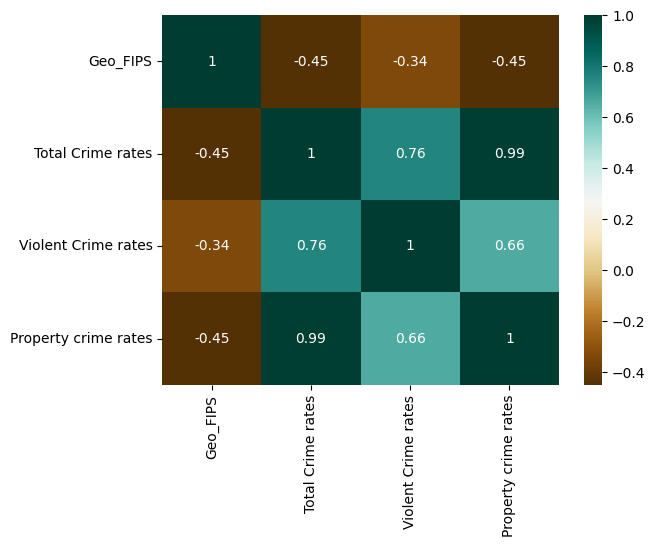

In [ ]:
sns.heatmap(dataset.corr().round(2),cmap="BrBG",annot=True)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
px.scatter(dataset, x="Violent Crime rates", y="Property crime rates", color="Total Crime rates",
                  hover_data=['County'],width=1000,height=600)


**Conclusion**

From the analysis

# **General Conclusion of the Analysis**

Generally from the analysis its gives a clear indication and relation between the the counties with high rates of employment has low per capita income, improper allocation of healthcare indicators and high crime rates. My analysis helps the states to give attention to the regions with poor or low social and economical growth so that there is proper alocation and distribution of resources such as security, healthcare units, businesses and infrastucture to boost the general states' economy